# Agenda  <a name="backtotop"></a>
---

1. [Description](#Description)
2. [MQL Reaching Methods Analysis](#ReachingMethods)
3. [Sale Performance Evaluation](#SalePerformance)
4. [Box Plot](#Boxplot)



# Description <a name="Description"></a>

[back to top](#backtotop)

Notice: The Following text are refered from https://www.kaggle.com/olistbr/marketing-funnel-olist/home

The dataset has information of 8k Marketing Qualified Leads (MQLs) that requested contact between Jun. 1st 2017 and Jun 1st 2018. They were randomly sampled from the total of MQLs.

Its features allows viewing a sales process from multiple dimensions: lead category, catalog size, behaviour profile, etc.

This is real data, it has been anonymized and sampled from the original dataset.
***

## Data Source <a name="DataSource"></a>

[back to top](#backtotop)


### Closed Deals Dataset
> **Dataset Introduction**: <br>
> After a qualified lead fills in a form at a landing page he is contacted by a Sales Development Representative. At this step some information is checked and more information about the lead is gathered. <br>

> **Column Introduction**: <br>
> - mql_id: Marketing Qualified Lead id <br>
> - seller_id: Seller id <br>
> - sdr_id: Sales Development Representative id <br>
> - sr_id: Sales Representative <br>
> - won_date: Date the deal was closed. <br>
> - business_segment: Lead business segment. Informed on contact. <br>
> - lead_type: Lead type. Informed on contact. <br>
> - lead_behaviour_profile: Lead behaviour profile. SDR identify it on contact. <br>
> - has_company: Does the lead have a company (formal documentation)? <br>
> - has_gtin: Does the lead have Global Trade Item Number (barcode) for his products? <br>
> - average_stock: Lead declared average stock. Informed on contact. <br>
> - business_type: Type of business (reseller/manufacturer etc.) <br>
> - declared_product_catalog_size: Lead declared catalog size. Informed on contact.<br>
> - declared_monthly_revenue: Lead declared estimated monthly revenue. Informed on contact. <br>

### Marketing Qualified Leads
> **Dataset Introduction**: <br>
> After a lead fills in a form at a landing page, a filter is made to select the ones that are qualified to sell their products at Olist. They are the Marketing Qualified Leads (MQLs). <br>

> **Column Introduction**: <br>
> - mql_id: Marketing Qualified Lead id <br>
> - first_contact_date: Date of the first contact solicitation. <br>
> - landing_page_id: Landing page id where the lead was acquired <br>
> - origin: Type of media where the lead was acquired <br>

The following cell shows sample data from the two datasets

In [331]:
import pandas as pd
path = "/Users/wangqiong/Documents/python project/Case Study on Kaggle/dataset/"
closed_deals_fn = "olist_closed_deals_dataset.csv"
MQL_fn = "olist_marketing_qualified_leads_dataset.csv"
closed_deals_df = pd.read_csv(path+closed_deals_fn)
display(closed_deals_df.head())
MQL_df = pd.read_csv(path + MQL_fn)
display(MQL_df.head())

,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue
0,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0
1,a555fb36b9368110ede0f043dfc3b9a0,bbb7d7893a450660432ea6652310ebb7,09285259593c61296eef10c734121d5b,d3d1e91a157ea7f90548eef82f1955e3,2018-05-08 20:17:59,car_accessories,industry,eagle,NaN,NaN,NaN,reseller,NaN,0.0
2,327174d3648a2d047e8940d7d15204ca,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,home_appliances,online_big,cat,NaN,NaN,NaN,reseller,NaN,0.0
3,f5fee8f7da74f4887f5bcae2bafb6dd6,21e1781e36faf92725dde4730a88ca0f,56bf83c4bb35763a51c2baab501b4c67,d3d1e91a157ea7f90548eef82f1955e3,2018-01-17 13:51:03,food_drink,online_small,NaN,NaN,NaN,NaN,reseller,NaN,0.0
4,ffe640179b554e295c167a2f6be528e0,ed8cb7b190ceb6067227478e48cf8dde,4b339f9567d060bcea4f5136b9f5949e,d3d1e91a157ea7f90548eef82f1955e3,2018-07-03 20:17:45,home_appliances,industry,wolf,NaN,NaN,NaN,manufacturer,NaN,0.0


,mql_id,first_contact_date,landing_page_id,origin
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search


In [379]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime

In [333]:
MQL_df["first_contact_date"] = pd.to_datetime(MQL_df["first_contact_date"], format = '%Y-%m')
MQL_df["first_contact_date (y-m)"] = MQL_df["first_contact_date"].dt.to_period("M")
MQL_first_contact_date = MQL_df.groupby(by = "first_contact_date (y-m)").mql_id.count()
MQL_first_contact_date.to_frame().T

first_contact_date (y-m),2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05
mql_id,4,239,386,312,416,445,200,1141,1028,1174,1352,1303


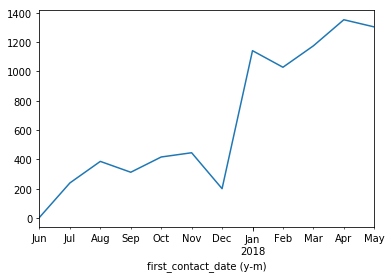

In [334]:
MQL_first_contact_date.plot.line()
plt.show()

## MQL Reaching Methods Analysis <a name="ReachingMethods"></a>
[back to top](#backtotop)
<br>
Count one column under the classification of another column <br>
The following form shows the methods where and when MQL contacted Olist

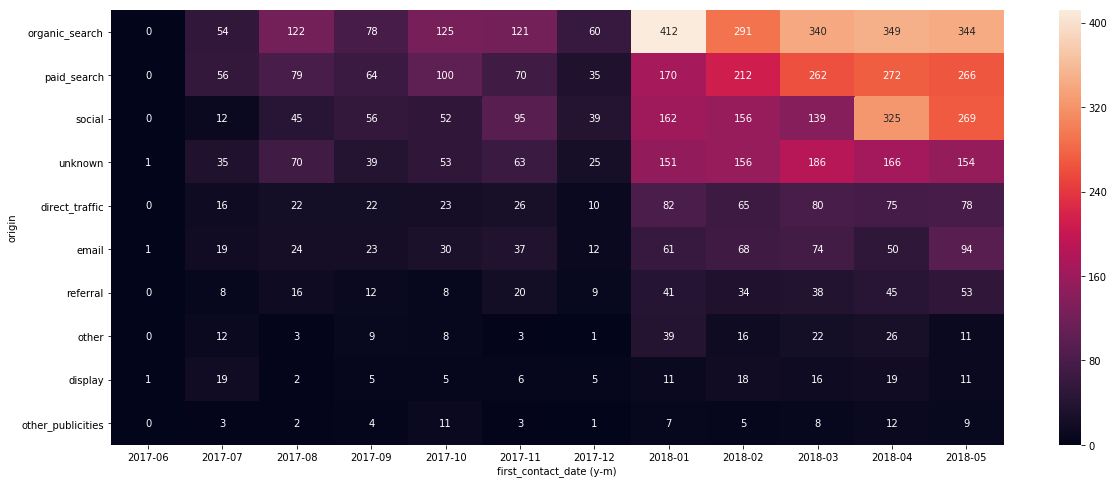

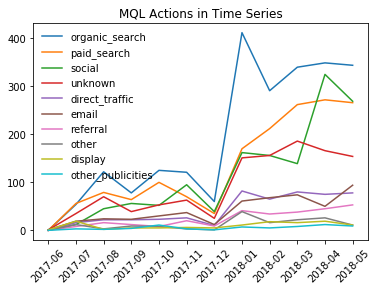

<Figure size 72x72 with 0 Axes>

In [335]:
MQL_origin = pd.pivot_table(MQL_df,
                            index='origin',
                            columns='first_contact_date (y-m)',
                            values='mql_id',                            
                            aggfunc='count',
                            fill_value=0)
origin_list = MQL_df.groupby('origin').mql_id \
                                   .count() \
                                   .sort_values(ascending=False) \
                                   .index

MQL_origin = MQL_origin.reindex(origin_list)
plt.figure(figsize = (20, 8))
sns.heatmap(MQL_origin, annot = True, fmt='g')
plt.show()
for index in MQL_origin.index:
    plt.plot(list(MQL_origin.columns.strftime("%Y-%m")), MQL_origin.loc[index].values, label = index)
plt.xticks(rotation = 45)
plt.legend(loc=0, frameon=False)
plt.title("MQL Actions in Time Series")
plt.figure(figsize=(1,1))
plt.show()

### Marketing Channel Effective Analysis
<br>
- "Organic_search" was the most common marketing channel. Meanwhile, the "Organic search" was the biggest contributor to the rising MQLs from 2017-12 to 2018-01 <br>
- "Display" did not indicate a relatively "good" marketing effect

## Sale Performance Evaluation <a name = "SalePerformance"> </a>

[back to top](#backtotop)

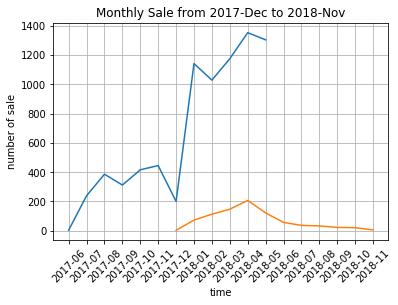

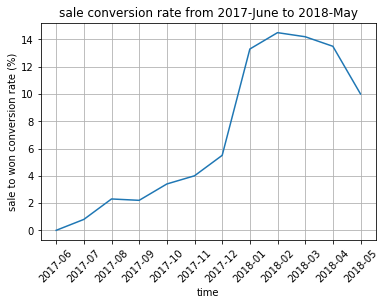

In [336]:
MQL_df_tmp = MQL_df.copy()
MQL_df_tmp = MQL_df_tmp.merge(closed_deals_df, on = "mql_id", how = 'left')[["seller_id", "won_date", "first_contact_date (y-m)"]]
MQL_df_tmp["won_date"] = pd.to_datetime(MQL_df_tmp["won_date"], format = "%Y-%m")
MQL_df_tmp["won_date"] = MQL_df_tmp.won_date.dt.to_period("M")
MQL_df_tmp["seller_id_counter"] = MQL_df_tmp.seller_id.notna()
close_sale_over_month_dict = MQL_df_tmp.groupby("won_date").seller_id_counter.count()
open_sale_over_month_dict = MQL_df_tmp.groupby("first_contact_date (y-m)").seller_id_counter.count()


x = list(open_sale_over_month_dict.keys().strftime("%Y-%m"))
y = open_sale_over_month_dict.values

fig, ax = plt.subplots()
ax.plot(x, y)
ax.set(xlabel = 'time', ylabel= 'number of sale',
    title = "Monthly Sale from 2017-Dec to 2018-Nov")
ax.grid()
plt.xticks(rotation = 45)

x = list(close_sale_over_month_dict.keys().strftime("%Y-%m"))
y = close_sale_over_month_dict.values

ax.plot(x, y)

plt.show()


MQL_monthly_conversion_df = MQL_df_tmp.groupby(by='first_contact_date (y-m)')['seller_id_counter'].agg(['count', 'sum'])
MQL_monthly_conversion_df['Conversion'] = (MQL_monthly_conversion_df["sum"]/MQL_monthly_conversion_df["count"]*100).round(1)


def PlotLineGraph(x, y, path = None):
    fig, ax = plt.subplots()
    ax.plot(x, y)
    ax.set(xlabel = 'time', ylabel= 'sale to won conversion rate (%)',
        title = 'sale conversion rate from 2017-June to 2018-May')
    ax.grid()
    if path:
        fig.savefig(path)
    plt.xticks(rotation = 45)
    plt.show()

    
PlotLineGraph(MQL_monthly_conversion_df.index.astype(str), MQL_monthly_conversion_df.Conversion.values)


### Sale Conversion Analysis 

- The conversion rate increases as more MQL coming in
> - The new MQLs show more loyalty to the company. The loyalty likely came from customer connection, company fame, and caring customer services

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


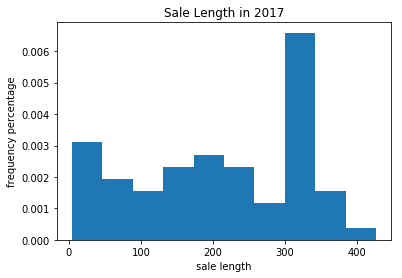

/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


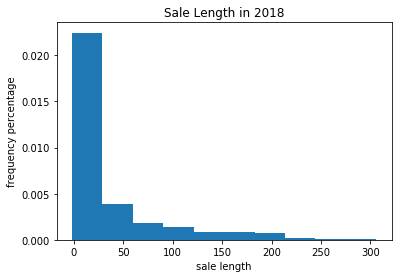

In [434]:
MQL_df_tmp = closed_deals_df.merge(MQL_df, on = "mql_id", how = "right")
closed_date = MQL_df_tmp.won_date.notna()
closed_sale_df = MQL_df_tmp[closed_date].copy()
closed_sale_df["sale length"] = pd.to_datetime(closed_sale_df["won_date"], format = "%Y-%m-%d").dt.date - closed_sale_df["first_contact_date"].apply(lambda x: datetime.date(x))
lead2017 = closed_sale_df["first_contact_date (y-m)"].dt.year.astype(str) == "2017"
lead2018 = closed_sale_df["first_contact_date (y-m)"].dt.year.astype(str) == "2018"

MQL_df_tmp2017 = closed_sale_df[closed_date & lead2017]
MQL_df_tmp2018 = closed_sale_df[closed_date & lead2018]

MQL_df_tmp2017["sale length"].dt.days.plot.hist(density = True)
plt.xlabel("sale length")
plt.ylabel("frequency percentage")
plt.title("Sale Length in 2017")
plt.show()
MQL_df_tmp2018["sale length"].dt.days.plot.hist(normed = True)
plt.xlabel("sale length")
plt.ylabel("frequency percentage")
plt.title("Sale Length in 2018")
plt.show()

### Sale Length Analysis

- The sale process increased significantly in 2018. 50% (0.02*25) sale are finished within 25 days <br>
- The sale length patten becomes more regular in 2018. The sale cases with longer period are less likely to happen in 2018. In contrast, there was no obvious correlation between sale length and frequency

In [449]:
closed_deals_df_profile = closed_deals_df[closed_deals_df["lead_behaviour_profile"].notna()].copy()
closed_deals_df_profile.lead_behaviour_profile.value_counts()

cat            407
eagle          123
wolf            95
shark           24
cat, wolf        8
eagle, wolf      3
eagle, cat       3
shark, cat       1
shark, wolf      1
Name: lead_behaviour_profile, dtype: int64

In [455]:
#Combine mixed behavour to other
profile_list = ['cat', 'eagle', 'wolf', 'shark']
closed_deals_df_profile["lead_behaviour_profile(upd)"] = closed_deals_df_profile.lead_behaviour_profile.map(lambda x: x if x in profile_list else 'other')
closed_deals_df_profile["lead_behaviour_profile(upd)"].value_counts()

cat      407
eagle    123
wolf      95
shark     24
other     16
Name: lead_behaviour_profile(upd), dtype: int64

In [484]:
index = closed_deals_df_profile["lead_behaviour_profile(upd)"].value_counts().index
cols = closed_deals_df_profile["lead_type"].value_counts().index

behaviour_type_df = pd.pivot_table(closed_deals_df_profile, index = "lead_behaviour_profile(upd)",
              columns = "lead_type", values= "mql_id", aggfunc= "count", fill_value = 0)
behaviour_type_df = behaviour_type_df.reindex(index)[cols]

In [485]:
cols = closed_deals_df_profile["business_type"].value_counts().index

behaviour_business_df = pd.pivot_table(closed_deals_df_profile, index = "lead_behaviour_profile(upd)", columns = "business_type",
                                      values= "mql_id", aggfunc='count', fill_value=0)
behaviour_business_df = behaviour_business_df.reindex(index)[cols]

In [487]:
cols = closed_deals_df_profile["business_segment"].value_counts().index

behaviour_business_segment_df = pd.pivot_table(closed_deals_df_profile, index = "lead_behaviour_profile(upd)", columns = "business_segment",
                                      values= "mql_id", aggfunc='count', fill_value=0)
behaviour_business_segment_df = behaviour_business_segment_df.reindex(index)[cols]

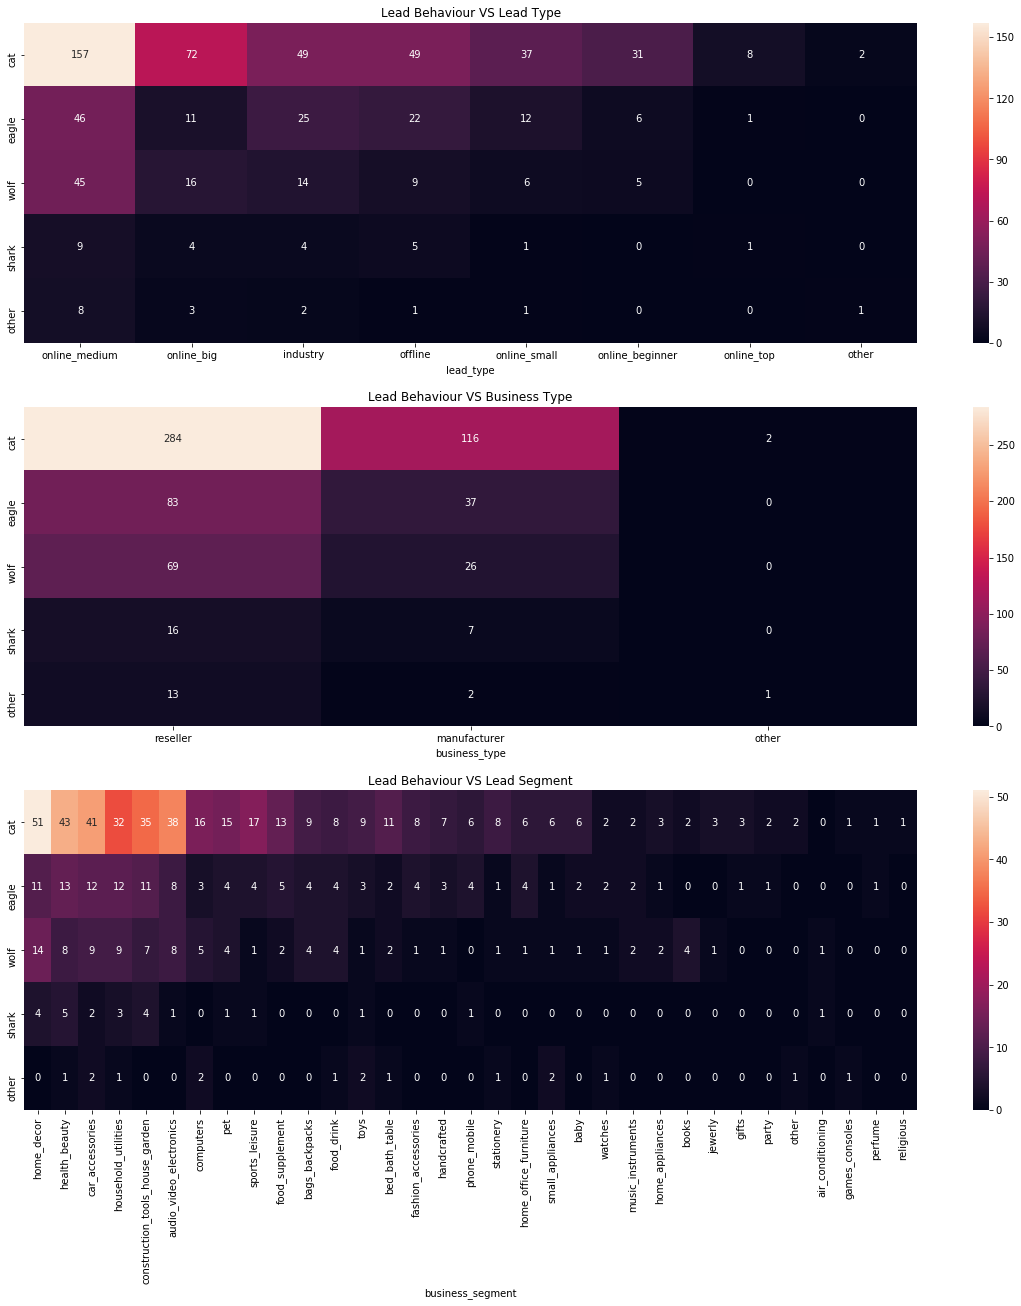

In [497]:
figure, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize = (20, 20))

figure.subplots_adjust(hspace = 0.2)

sns.heatmap(behaviour_type_df, fmt = 'g', annot= True, ax = ax1)

sns.heatmap(behaviour_business_df, fmt = 'g', annot= True, ax = ax2)

sns.heatmap(behaviour_business_segment_df, fmt = 'g', annot= True, ax = ax3)

ax1.set_title("Lead Behaviour VS Lead Type")

ax2.set_title("Lead Behaviour VS Business Type")

ax3.set_title("Lead Behaviour VS Lead Segment")


plt.show()